In [74]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

data = pd.read_csv("Healthcare_Investments_and_Hospital_Stay (1).csv")
data

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53
...,...,...,...,...,...,...
513,LTU,2014,6.8,10.57,22.17,10.57
514,LTU,2015,6.6,11.02,21.00,11.02
515,LTU,2016,6.6,12.20,23.01,12.20
516,LTU,2017,6.5,12.37,23.33,12.37


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       518 non-null    object 
 1   Time           518 non-null    int64  
 2   Hospital_Stay  518 non-null    float64
 3   MRI_Units      518 non-null    float64
 4   CT_Scanners    518 non-null    float64
 5   Hospital_Beds  518 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 24.4+ KB


In [51]:
data.isnull().sum()

Location         0
Time             0
Hospital_Stay    0
MRI_Units        0
CT_Scanners      0
Hospital_Beds    0
dtype: int64

In [52]:
import seaborn as sns

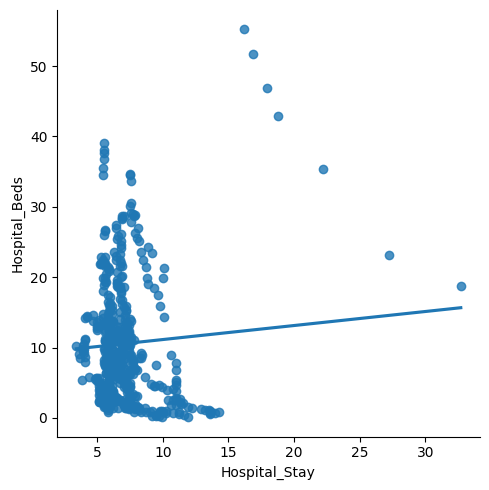

In [18]:
sns.lmplot(x="Hospital_Stay", y="Hospital_Beds", data=data, fit_reg=True, ci=None)

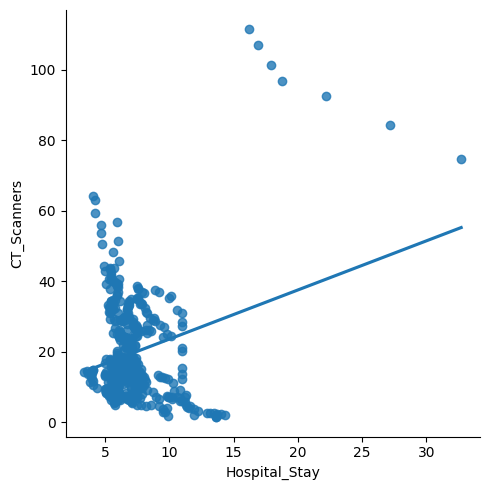

In [19]:
sns.lmplot(x="Hospital_Stay", y="CT_Scanners", data=data, fit_reg=True, ci=None)

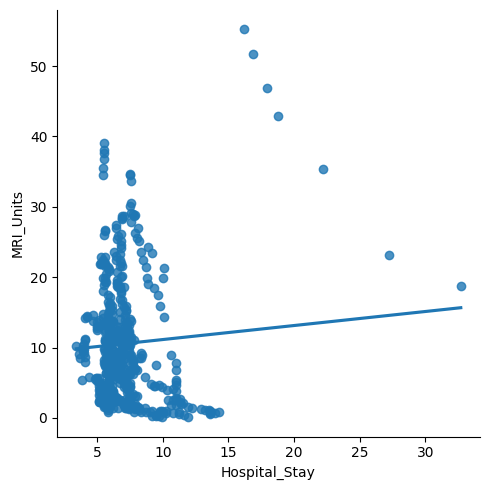

In [20]:
sns.lmplot(x="Hospital_Stay", y="MRI_Units", data=data, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

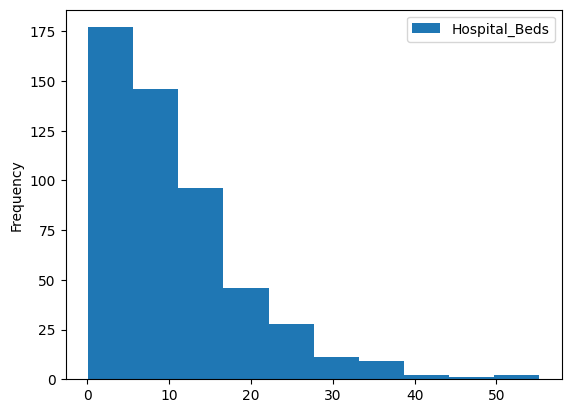

In [22]:
data.plot.hist(y="Hospital_Beds")

In [23]:
data=data.dropna()

In [24]:
data

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53
...,...,...,...,...,...,...
513,LTU,2014,6.8,10.57,22.17,10.57
514,LTU,2015,6.6,11.02,21.00,11.02
515,LTU,2016,6.6,12.20,23.01,12.20
516,LTU,2017,6.5,12.37,23.33,12.37


In [37]:
data

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53
...,...,...,...,...,...,...
513,LTU,2014,6.8,10.57,22.17,10.57
514,LTU,2015,6.6,11.02,21.00,11.02
515,LTU,2016,6.6,12.20,23.01,12.20
516,LTU,2017,6.5,12.37,23.33,12.37


In [38]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [58]:
def preprocess_inputs(df):
    df = df.copy()
    
    # One-hot encode Location column
    df = onehot_encode(df, column='Location')
    
    # Split df into X and y
    y = df['Hospital_Stay'].copy()
    X = df.drop('Hospital_Stay', axis=1).copy()
    
    # Train-test data split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test

In [40]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [41]:
X_train

,Time,MRI_Units,CT_Scanners,Hospital_Beds,AUS,AUT,BEL,CAN,CZE,DEU,...,LVA,NLD,NZL,POL,PRT,RUS,SVK,SVN,TUR,USA
0,-0.303643,0.502340,-0.349986,0.502340,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
1,-0.738679,-0.697320,-0.873325,-0.697320,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
2,0.131392,-0.562147,-0.392384,-0.562147,-0.207913,-0.207913,-0.177028,-0.215041,4.809712,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
3,0.276404,-0.018076,-0.295665,-0.018076,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,6.262765,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
4,1.001462,1.174825,1.272365,1.174825,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1.146474,-0.248996,-0.302952,-0.248996,-0.207913,-0.207913,-0.177028,-0.215041,4.809712,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
358,0.276404,-0.678170,-0.378472,-0.678170,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,5.648813,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
359,-0.013620,-0.589181,-0.850140,-0.589181,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
360,-0.013620,-0.317709,-0.623580,-0.317709,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,5.181327,-0.140422


In [42]:
y_train

121    7.2
378    7.3
91     6.7
310    6.1
479    5.9
      ... 
98     5.9
322    7.3
382    6.3
365    4.1
510    7.0
Name: Hospital_Stay, Length: 362, dtype: float64

In [71]:
models = {
    "                     Linear Regression": LinearRegression(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor(),
    "                               XGBoost": XGBRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                     Linear Regression trained.
                   K-Nearest Neighbors trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.


In [75]:
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    print(name + " Mean Squared Error: {:.5f}".format(mse))

                     Linear Regression Mean Squared Error: 0.67919
                   K-Nearest Neighbors Mean Squared Error: 0.42473
   Support Vector Machine (RBF Kernel) Mean Squared Error: 0.55603
                         Decision Tree Mean Squared Error: 0.23635
                         Random Forest Mean Squared Error: 0.19687
                     Gradient Boosting Mean Squared Error: 0.31678
                               XGBoost Mean Squared Error: 0.11515


In [79]:
from sklearn.metrics import mean_squared_error

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    print(name + " RMSE: {:.5f}".format(rmse))

                     Linear Regression RMSE: 0.82413
                   K-Nearest Neighbors RMSE: 0.65172
   Support Vector Machine (RBF Kernel) RMSE: 0.74567
                         Decision Tree RMSE: 0.53283
                         Random Forest RMSE: 0.45372
                     Gradient Boosting RMSE: 0.54986
                               XGBoost RMSE: 0.33934


In [80]:
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))

                     Linear Regression R^2 Score: 0.85202
                   K-Nearest Neighbors R^2 Score: 0.90746
   Support Vector Machine (RBF Kernel) R^2 Score: 0.87885
                         Decision Tree R^2 Score: 0.93814
                         Random Forest R^2 Score: 0.95515
                     Gradient Boosting R^2 Score: 0.93412
                               XGBoost R^2 Score: 0.97491


In [83]:
from sklearn.metrics import mean_absolute_error

for name, model in models.items():
    
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    print(name + " Mean Absolute Error: {:.5f}".format(mae))

                     Linear Regression Mean Absolute Error: 0.60649
                   K-Nearest Neighbors Mean Absolute Error: 0.36359
   Support Vector Machine (RBF Kernel) Mean Absolute Error: 0.44757
                         Decision Tree Mean Absolute Error: 0.31731
                         Random Forest Mean Absolute Error: 0.32069
                     Gradient Boosting Mean Absolute Error: 0.44080
                               XGBoost Mean Absolute Error: 0.24073
